### 1. Package and requirements

In [22]:
# @title
!pip install xlrd --upgrade
import xlrd
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Markdown

### 2. Read data

In [23]:
# @title
rainfall_history = pd.read_csv("https://raw.githubusercontent.com/Juanmeve837/ETL_appsheet_googlesheet_colab/refs/heads/main/Data/output/Rainfall_history.csv", index_col=0)
cat_clean = pd.read_csv("https://raw.githubusercontent.com/Juanmeve837/ETL_appsheet_googlesheet_colab/refs/heads/main/Data/output/Shovels_CAT_clean_output.csv", index_col=0)
cat_raw= pd.read_csv("https://raw.githubusercontent.com/Juanmeve837/ETL_appsheet_googlesheet_colab/refs/heads/main/Data/output/Shovels_CAT_raw_output.csv", index_col=0)
kom_clean= pd.read_csv("https://raw.githubusercontent.com/Juanmeve837/ETL_appsheet_googlesheet_colab/refs/heads/main/Data/output/Shovels_Komatsu_output.csv", index_col=0)
performance= pd.read_csv("https://raw.githubusercontent.com/Juanmeve837/ETL_appsheet_googlesheet_colab/refs/heads/main/Data/output/equip_perf_output.csv", index_col=0)


### 3.Transform data

In [24]:
# @title
kom_clean["machine_hours"] = kom_clean["operating_hours"]+kom_clean["idle_hours"]
kom_clean["idle_percentage"] = ((kom_clean["idle_hours"]/kom_clean["machine_hours"])*100).round(1)
kom_clean["operating_percentage"] = ((kom_clean["operating_hours"]/kom_clean["machine_hours"])*100).round(1)
kom_clean = kom_clean.drop(columns=['operating_hours', 'idle_hours'])
kom_clean = kom_clean[cat_clean.columns.values]

In [25]:
# @title
df = pd.concat([kom_clean, cat_clean])
df.index = pd.to_datetime(df.index)
df['year'] = df.index.year
df['month'] = df.index.month
df['week'] = df.index.isocalendar().week
df = df.sort_values(by='week')

### 4. Analysis of shovel productivity and utilization

In [26]:
# @title Date

start_date = '2025-03-02' # @param {type:"date"}
end_date = '2025-03-08' # @param {type:"date"}

#### 4.1 Shovel working hours

In [27]:
# @title

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date )

df_filter = df[(df.index >= start_date) & (df.index <= end_date )]

prom = df_filter.groupby('Shovel')[['machine_hours']].sum().round(1)

print("Machine hours accumulated between", start_date.date(), "and", end_date .date(), ":")
prom

Machine hours accumulated between 2025-03-02 and 2025-03-08 :


,machine_hours
Shovel,
CAT 320-1,85.6
CAT 336-8,109.7
CAT D8T-1,77.0
CAT D8T-3,82.6
CAT MOTO,95.2
KOM 360-12,117.8
KOM 360-13,86.5
KOM 360-14,115.1
KOM 390-10,67.0


### 4.2 Idling time analysis per equipment

In [28]:
# @title

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date )

df_filter = df[(df.index >= start_date) & (df.index <= end_date )]

prom = df_filter.groupby('Shovel')[['idle_percentage',"operating_percentage"]].mean().round(1)

print("Average idle percentage and operating percentage per machine between", start_date.date(), "and", end_date.date(), ":")
prom

Average idle percentage and operating percentage per machine between 2025-03-02 and 2025-03-08 :


,idle_percentage,operating_percentage
Shovel,,
CAT 320-1,30.9,69.1
CAT 336-8,19.6,80.4
CAT D8T-1,15.6,84.4
CAT D8T-3,16.6,83.4
CAT MOTO,13.6,86.4
KOM 360-12,16.5,83.5
KOM 360-13,25.0,75.0
KOM 360-14,15.2,84.8
KOM 390-10,16.6,83.4


In [29]:
# @title
fig = px.bar(prom.reset_index(), x="Shovel", y=["operating_percentage",'idle_percentage'],
             color_discrete_sequence=px.colors.qualitative.T10, text_auto=True)
fig.update_xaxes(type='category')
fig.show()

In [30]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }

Shovel = "CAT 336-8" # @param ['KOM 390-9', 'KOM 390-4', 'KOM 390-10', 'CAT 320-1', 'CAT 336-8','CAT MOTO', 'CAT 320-2', 'CAT 336-3', 'CAT D8T-3', 'CAT D8T-2','CAT D8T-1', 'KOM 360-12', 'KOM 360-14', 'KOM 360-13', 'CAT 349-6']
print('You selected', Shovel)

Year = "2025" # @param ["2024", "2025"]
print('You selected', Year)

# Filter the dataframe by user selections
df_filtered = df[(df["Shovel"] == Shovel) & (df["year"] == int(Year))]

# Group by week and calculate average idle percentage
weekly_idle = df_filtered.groupby("week", as_index=False)["idle_percentage"].mean()

# Create interactive line chart
fig = px.line(
    weekly_idle,
    x="week",
    y="idle_percentage",
    markers=True,
    title=f"Idle Percentage for {Shovel} in {Year}"
)

fig.update_layout(
    width=1500,
    height=600,
)

# Update axis labels
fig.update_layout(
    xaxis_title="Week",
    yaxis_title="Idle Percentage (%)",
    template="plotly_white",
    title_x=0.5
)

fig.show()

You selected CAT 336-8
You selected 2025


### 4.3 Fuel vs. Working Hours

In [31]:
# @title
prom3 = df_filter.groupby("Shovel")["gal_hour"].mean().round(1)

fig = px.bar(prom3.reset_index(), x="Shovel", y="gal_hour",
             color_discrete_sequence=px.colors.qualitative.T10, text_auto=True)
fig.update_xaxes(type='category')
fig.show()

In [32]:
# @title
df['in_range'] = df.index.to_series().between(start_date, end_date).astype(int).astype(str)
df['in_range'] = df['in_range'].replace({"0": "historic", "1": "in range"})


In [33]:
# @title
fig = px.scatter(
    df,
    x='machine_hours',
    y='total_fuel',
    color='in_range',
    facet_col="Shovel"
)

# Quitar "Shovel=" en los títulos de cada faceta
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Rango y visibilidad de ejes
fig.update_xaxes(showticklabels=True, range=[0, 30])
fig.update_yaxes(showticklabels=True, range=[0, 220])

# Actualizar títulos de los ejes (globales, no repetidos)
fig.update_layout(
    xaxis_title="Work Hours",
    yaxis_title="Gallone",
    legend_title="Period"
)

fig.show()

### 4.4 Availability, Downtime, Connection Error since 2024

In [34]:
# @title

kom_cat = pd.concat([kom_clean.reset_index(), cat_raw])
df_pivot = kom_cat.reset_index().pivot(index='Date', columns='Shovel', values='machine_hours')
categorical_data = df_pivot.map(lambda x: 2 if pd.isna(x) else (1 if x != 0 else 0))


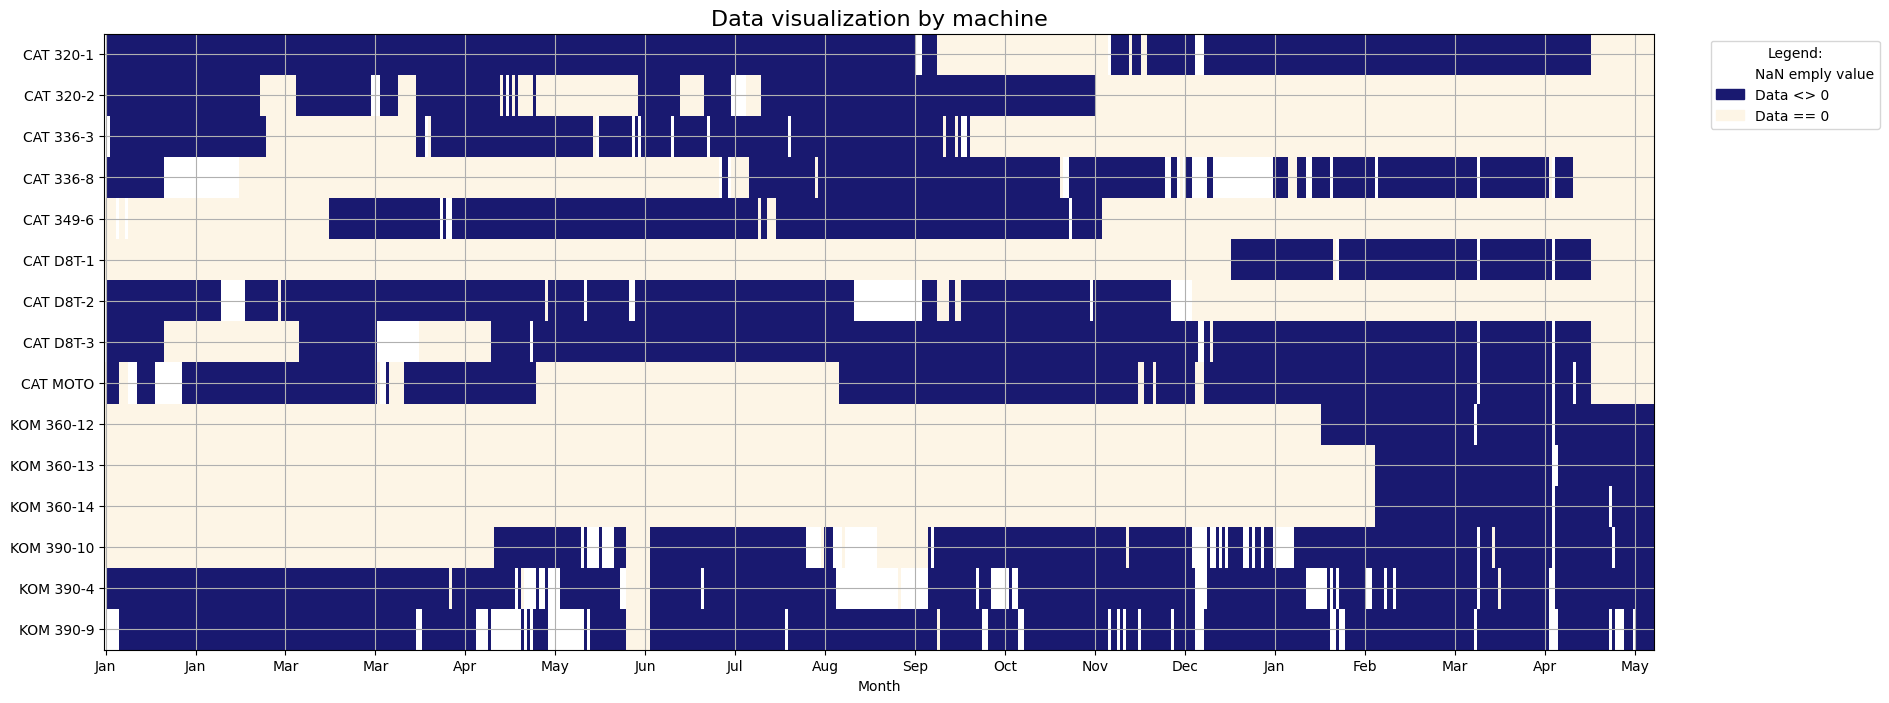

In [35]:
# @title
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["white", "#191970", "oldlace"])

fig, ax = plt.subplots(figsize=(20, 8))
im = ax.imshow(
    categorical_data.values.T,
    aspect='auto',
    cmap=cmap,
    vmin=0,
    vmax=2,
    interpolation='nearest'
)

plt.yticks(range(df_pivot.shape[1]), df_pivot.columns)

plt.title("Data visualization by machine", fontsize=16)

legend_patches = [
    mpatches.Patch(color="white", label="NaN emply value"),
    mpatches.Patch(color="#191970", label="Data <> 0"),
    mpatches.Patch(color="oldlace", label="Data == 0"),
]

ax.legend(
    handles=legend_patches,
    loc="upper right",
    bbox_to_anchor=(1.15, 1),
    title="Legend:"
)

fechas = pd.date_range("2024-01-01", periods=categorical_data.shape[0], freq="D")
plt.xticks(
    ticks=np.arange(0, len(fechas), 30),
    labels=fechas.strftime("%b")[::30]
)
plt.xlabel("Month")

ax.grid(True)

plt.show()

### 4.5 machine hours vs rainfall history

In [36]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }

year = "2025" # @param ["2024", "2025"]
print('You selected year:', Year)

# Filter DataFrame by year
df_filtered = df[df["year"] == int(year)]

# Group by year and month, summing machine_hours
df_grouped = (
    df_filtered.groupby(["year", "month"], as_index=False)["machine_hours"]
    .sum()
)

rainfall_df = rainfall_history.reset_index()
rainfall_df["Date"] = pd.to_datetime(rainfall_df["Date"])
rainfall_df["year"] = rainfall_df["Date"].dt.year
rainfall_df["month"] = rainfall_df["Date"].dt.month

rainfall_df = rainfall_df[rainfall_df["year"] == int(year)]

# Agrupar rainfall por mes
rainfall_grouped = (
    rainfall_df.groupby(["year", "month"], as_index=False)["rainfall_mm"]
    .sum())

fig = go.Figure()

# Barras: machine_hours
fig.add_trace(
    go.Bar(
        x=df_grouped["month"],
        y=df_grouped["machine_hours"],
        name="Machine Hours",
        text=df_grouped["machine_hours"].round(1),
        textposition="outside",
        yaxis="y1"
    )
)

# Línea: rainfall_mm
fig.add_trace(
    go.Scatter(
        x=rainfall_grouped["month"],
        y=rainfall_grouped["rainfall_mm"],
        mode="lines+markers",
        name="Rainfall (mm)",
        yaxis="y2"
    )
)

# --- 5. Ajustes de ejes ---
fig.update_layout(
    title=f"Machine Hours and Rainfall Accumulated per Month in {year}",
    xaxis=dict(title="Month", dtick=1),
    yaxis=dict(title="Machine Hours", side="left"),
    yaxis2=dict(
        title="Rainfall (mm)",
        overlaying="y",
        side="right"
    ),
    bargap=0.2,
    width=1200,
    height=500
)

fig.show()


You selected year: 2025


### 4.6 Production (m3) by machine in selected interval

In [37]:
# @title
performance_avg = performance.groupby("Shovel")["Performance"].mean()
df_filter = df[(df.index >= start_date) & (df.index <= end_date )]
prom = df_filter.groupby('Shovel')[['machine_hours']].sum().round(1)
df_perf = performance_avg.to_frame(name="Performance").round(1)
df_merge = df_perf.join(prom, how="inner")
df_merge["Production"] = (df_merge["machine_hours"] * df_merge["Performance"]).round(1)
df_merge

,Performance,machine_hours,Production
Shovel,,,
CAT 320-1,200.4,85.6,17154.2
CAT 336-8,241.7,109.7,26514.5
KOM 360-13,190.0,86.5,16435.0
KOM 360-14,199.1,115.1,22916.4
KOM 390-10,203.1,67.0,13607.7
KOM 390-4,203.2,17.9,3637.3
KOM 390-9,195.3,99.8,19490.9


In [38]:
# @title
fig = px.bar(
    df_merge.sort_values("Production", ascending=True).reset_index(),
    x="Production",
    y="Shovel",
    orientation="h",
    text="Production",  # valores en las barras
    title="Production by shovel m3"
)

# Formato de los textos y barras
fig.update_traces(texttemplate="%{text:.1f}", textposition="outside")
fig.update_layout(
    xaxis_title="Production",
    yaxis_title="Shovel",
    height=500
)

fig.show()